In [1]:
import numpy as np
import pandas as pd
import pandas_ta as ta
import matplotlib.pyplot as plt

Import Data

In [2]:
listname = pd.read_csv("_ind_nifty100list.csv")
listname.head()

,Company Name,Industry,Symbol,Series,ISIN Code
0,ACC Ltd.,Construction Materials,ACC,EQ,INE012A01025
1,Adani Enterprises Ltd.,Metals & Mining,ADANIENT,EQ,INE423A01024
2,Adani Green Energy Ltd.,Power,ADANIGREEN,EQ,INE364U01010
3,Adani Ports and Special Economic Zone Ltd.,Services,ADANIPORTS,EQ,INE742F01042
4,Adani Transmission Ltd.,Power,ADANITRANS,EQ,INE931S01010


In [3]:
list_stock = []

for i in range(len(listname['Symbol'])):
    try:
        list_stock.append(pd.read_csv("{}.csv".format(listname['Symbol'][i])))
        list_stock[i].insert(1, 'Symbol', listname['Symbol'][i])
    except:
        continue

Pre-process

In [4]:
def momentum(df, day):
    return df.Close - df.Close.shift(day)

def RSI(df, period):
    return df.ta.rsi(close='Close', length=period)

def psar(df):
    return df.ta.psar(high=df['High'], low=df['Low'], close=df['Close'], af0=0, af=0, max_af=0)

def atr(df, period):
    return df.ta.atr(high=df['High'], low=df['Low'], close=df['Close'], length=period)

def tr(df):
    return df.ta.true_range(high=df['High'], low=df['Low'], close=df['Close'])

def chaikin(df):
    return df.ta.cmf(high=df['High'], low=df['Low'], close=df['Close'], volume=df['Volume'])

def obv(df):
    return df.ta.obv(close=df['Close'], volume=df['Volume'])

In [5]:
for stock in list_stock:
    stock['r1'] = np.log(stock.Close / stock.Close.shift(1))
    stock['r2'] = np.log(stock.Close / stock.Close.shift(2))
    stock['r3'] = np.log(stock.Close / stock.Close.shift(3))
    stock['r4'] = np.log(stock.Close / stock.Close.shift(4))

    stock['r5'] = np.log(stock.High / stock.Open)
    stock['r6'] = np.log(stock.High / stock.Open.shift(1))
    stock['r7'] = np.log(stock.High / stock.Open.shift(2))
    stock['r8'] = np.log(stock.High / stock.Open.shift(3))

    stock['r9'] = np.log(stock.High.shift(1) / stock.Open.shift(1))
    stock['r10'] = np.log(stock.High.shift(2) / stock.Open.shift(2))
    stock['r11'] = np.log(stock.High.shift(3) / stock.Open.shift(3))

    stock['r12'] = np.log(stock.Low / stock.Open)
    stock['r13'] = np.log(stock.Low / stock.Open.shift(1))
    stock['r14'] = np.log(stock.Low / stock.Open.shift(2))
    stock['r15'] = np.log(stock.Low / stock.Open.shift(3))

    stock['Momentum'] = momentum(stock, 10)
    
    try:
        stock['RSI_14'] = RSI(stock, 14)
        stock['atr'] = atr(stock, 14)
        stock['tr'] = tr(stock)
        stock['chaikin'] = chaikin(stock)
        stock['obv'] = obv(stock)
    
    except:
        continue

    stock.loc[(stock.Close.shift(-1) - stock.Close) / stock.Close > 0.001, 'output'] = 1
    stock.loc[(stock.Close.shift(-1) - stock.Close) / stock.Close <= 0.001, 'output'] = 0

In [6]:
for stock in list_stock:
    stock.dropna(inplace=True)
    #stock.set_index('Date', inplace=True)
    stock.reset_index(inplace=True)
    stock.drop(['index'], axis=1, inplace=True)


split in-sample and out-sample

In [7]:
from sklearn.model_selection import train_test_split

samp_in, samp_out = train_test_split(list_stock, test_size=0.3)

train test split in-sample

In [8]:
full_samp_in = pd.concat(samp_in)
full_samp_in.reset_index(inplace=True)
full_samp_in.drop(['index'], axis=1, inplace=True)
full_samp_in

,Date,Symbol,Open,High,Low,Close,Adj Close,Volume,r1,r2,...,r13,r14,r15,Momentum,RSI_14,atr,tr,chaikin,obv,output
0,2022-03-09,HDFCAMC,2125.000000,2155.949951,2080.149902,2133.399902,2086.261719,258617,0.013924,0.045478,...,0.024404,0.000072,0.003950,-48.300049,47.325843,72.824371,75.800049,0.100590,352716.0,1.0
1,2022-03-10,HDFCAMC,2185.000000,2185.000000,2140.449951,2169.399902,2121.466064,318952,0.016734,0.030658,...,0.007244,0.052980,0.028648,-13.550049,52.505144,70.862783,51.600098,0.104662,671668.0,0.0
2,2022-03-11,HDFCAMC,2173.000000,2179.000000,2140.000000,2167.800049,2119.901611,284426,-0.000738,0.015996,...,-0.020810,0.007034,0.052770,146.750000,52.259221,67.978515,39.000000,0.130045,387242.0,0.0
3,2022-03-14,HDFCAMC,2164.899902,2173.699951,2118.000000,2154.649902,2107.041992,241260,-0.006085,-0.006822,...,-0.025636,-0.031144,-0.003300,73.699951,50.178795,66.887864,55.699951,0.131440,145982.0,0.0
4,2022-03-15,HDFCAMC,2151.149902,2173.949951,2118.649902,2132.149902,2085.039307,260369,-0.010497,-0.016582,...,-0.021595,-0.025330,-0.030837,45.949951,46.749514,65.876170,55.300049,0.070026,-114387.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7211,2022-08-01,TCS,3327.000000,3327.000000,3271.000000,3298.800049,3298.800049,1306913,-0.000939,0.011678,...,-0.005792,0.016957,0.048867,235.300049,59.139716,70.548893,56.000000,-0.080905,-41529469.0,0.0
7212,2022-08-02,TCS,3290.000000,3312.899902,3271.649902,3291.800049,3291.800049,1269114,-0.002124,-0.003063,...,-0.016777,-0.005593,0.017156,217.550049,58.363189,68.455806,41.250000,-0.055170,-42798583.0,1.0
7213,2022-08-03,TCS,3280.000000,3349.000000,3277.050049,3339.500000,3339.500000,2895824,0.014387,0.012262,...,-0.003944,-0.015127,-0.003944,174.699951,62.022567,68.705422,71.949951,-0.046393,-39902759.0,1.0
7214,2022-08-04,TCS,3350.000000,3387.899902,3307.350098,3354.949951,3354.949951,2150567,0.004616,0.019002,...,0.008304,0.005260,-0.005924,177.649902,63.152194,69.551557,80.549804,-0.033780,-37752192.0,1.0


In [9]:
train, test = train_test_split(full_samp_in, test_size=0.3)

x_train = train.loc[:,'r1':'obv']
y_train = train.loc[:,'output']

x_test = test.loc[:,'r1':'obv']
y_test = test.loc[:,'output']

SVM

In [10]:
from sklearn import svm
from sklearn import metrics

model = svm.SVC(kernel='sigmoid', gamma=1, C = 0.5).fit(x_train, y_train)

In-sample

0.5137596515541477
0.5057736720554272


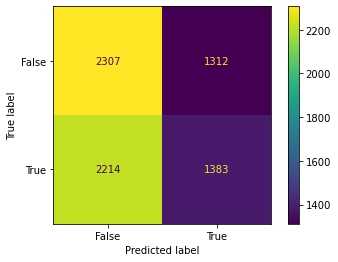

In [11]:

print(metrics.accuracy_score(y_train, model.predict(x_train)))
print(metrics.accuracy_score(y_test, model.predict(x_test)))

full_samp_in['signal'] = model.predict(full_samp_in.loc[:,'r1':'obv'])

confusion_matrix = metrics.confusion_matrix(full_samp_in['output'], full_samp_in['signal'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

Out-sample

0.49551282051282053


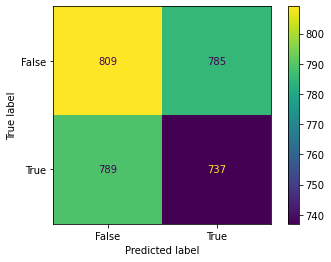

In [12]:
full_samp_out = pd.concat(samp_out)
full_samp_out.reset_index(inplace=True)
full_samp_out.drop(['index'], axis=1, inplace=True)
full_samp_out

full_samp_out['signal'] = model.predict(full_samp_out.loc[:,'r1':'obv'])

print(metrics.accuracy_score(full_samp_out['output'], model.predict(full_samp_out.loc[:,'r1':'obv'])))

confusion_matrix = metrics.confusion_matrix(full_samp_out['output'], full_samp_out['signal'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

Since accuracy is 50%, it is fruitless to continue further

In [ ]:
for stock in list_stock:
    stock['signal'] = model.predict(stock[stock.columns[7:28]])